#### Lead Score Case Study

- X Education has some business problem and they wants to build a model which can make prediction about hot lead to convert into customer. It is required to find the most promising lead.
- In problem statement, Institute needs top factors to focus on to get more conversion.

- We have started assignment firstly by understanding the actual requirement from the data-set.
- Below are the following Steps that we performed to build the logistic regression classification model.
  - Step-1: Understanding problem statement :Firstly go through the problem statement thoroughly and found it is classification problem. So we need to build a logistic regression model.
  - Step- 2: Import required libraries and load the data
  - Step -3: Sanity test and data understanding of data set
    Read the data into dataframe and check the various parameters like shape of data set, columns, description of numerical    variables, data types of columns.
  - Step -4: Data Preparation and Analysis
    Check the null values column-wise and row-wise, it is observed that there a lot of null values present in the dataset and we need to treat them.
    Also, there are a lot of categorical variables available in the data set and we need to either hot encode them or create dummies of them.
    Change the data types of the columns where required
  - Step -5: Outlier treatment
  - Perform the outlier analysis and few numerical columns have outliers and we analyze them and remove the outliers.
  - After cleaning and wrangling the data, we are left with 69% data from the actual data.
  
  - Step 6: Create dummy Variables
    Convert all categorical variables into dummy variables by encoding them.
  - Step -7: Split data and feature scaling
    Split the data into train and test and used the min max scalar to scale the data.
  - Step 8 : Check the correlation of train data for columns
  - Step 9: Feature Selection
    Used RFE method to select the most relevant columns to predict the target variables
  - Step 10: Model preparation
    Make the model using the logistic regression method. We do iteration by dropping variables with high p-value and VIF value to avoid multi-co-linearity.
  - Step 11: Check model accuracy score, Specificity, Sensitivity, Confusion matrix and build then build the ROC curve and then find the optimal cut off point.
    - Accuracy : 0.78
    - Sensitivity : 0.77
    - Specificity : 0.8
  - Step 12: Test the model on test data-set and check the accuracy parameters.
- We got the best fit model.
  - Accuracy : 0.79
  - Sensitivity : 0.81
  - Specificity : 0.78
- Step 13: Add the lead score column to assign lead score between 0-100.
- Step 14: Model is ready to make predictions with just 13 different variables.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# set the maximum rows,column,width
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [3]:
# import Data-set to dataframe
lead = pd.read_csv('C:/Users/hp/Videos/Lead/Leads.csv')

###### Sanity test and preprocessing of Data-set ######

In [4]:
# Check the first five rows of dataset
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Check the column names
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [6]:
# Check the shape of dataframe
rows,columns = lead.shape
print("Original Dataset")
print("Number of rows : ",rows)
print("Number of columns : ",columns)

Original Dataset
Number of rows :  9240
Number of columns :  37


In [7]:
# describe the dataframe  for numerical columns to check the mean,standard deviation etc.
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Check the info of the object to check the type of data and null objects
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

###### From the above information, it is observed that there alot of null values present in the dataset and we need to treat them
###### Also, there are alot of categorical variables available in the data set and we need to either hot encode them or create dummies of them

### Data Prepration and Analysis ###

In [9]:
# Check for duplicate values in the data set

In [10]:
sum(lead.duplicated(subset = 'Prospect ID'))

0

In [11]:
# Check the null values in the data set

In [12]:
# row -wise
lead.isnull().sum(axis = 1)

0       1
1       1
2       0
3       0
4       0
5       9
6       0
7       9
8       6
9       5
10      0
11      1
12      0
13      1
14      2
15      0
16      9
17      0
18      2
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      1
29      0
30      0
31      0
32      0
33      8
34      0
35      0
36      0
37      0
38      0
39      0
40      1
41      0
42      1
43      5
44      1
45      0
46      0
47      9
48      0
49      9
50      1
51      1
52      0
53      8
54      8
55      1
56      0
57      0
58      1
59      0
60      0
61      2
62      0
63      9
64      0
65      0
66      0
67      1
68      1
69      2
70      0
71      1
72      0
73      0
74      6
75      0
76      0
77      6
78      1
79      4
80      0
81      6
82      1
83      9
84      0
85      1
86      1
87      6
88      4
89      1
90      1
91      2
92      5
93      5
94      0
95      0
96      1
97      2
98      0
99      0


In [13]:
# Column-wise null values
round(100*(lead.isnull().sum(axis = 0)/len(lead.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [14]:
# Drop the columns which have missing values greater than 30 % because it will impcats the analysis and model

In [15]:
for col in lead.columns:
    if (round(100*(lead[col].isnull().sum(axis = 0)/len(lead.index)),2)) > 30:
        lead.drop(col,axis = 1, inplace = True)

In [16]:
# After dropping, again check for null values column-wise
round(100*(lead.isnull().sum(axis = 0)/len(lead.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [17]:
# Lets check the value counts of columns which have more number of null values

In [18]:
lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
South Africa               4
Canada                     4
Germany                    4
Kuwait                     4
Sweden                     3
Italy                      2
Philippines                2
Ghana                      2
Bangladesh                 2
China                      2
Asia/Pacific Region        2
Uganda                     2
Netherlands                2
Belgium                    2
Kenya                      1
Tanzania                   1
Liberia                    1
Denmark                    1
Russia                     1
Sri Lanka                  1
Vietnam       

In [19]:
lead.drop(['Country'],axis = 1, inplace = True)

In [20]:
lead['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [21]:
lead['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [22]:
sum(lead['How did you hear about X Education'] == 'Select')/len(lead.index)

0.5457792207792208

In [23]:
lead.drop(['How did you hear about X Education'],axis = 1, inplace = True)

###### Variable "How did you hear about X Education" has null value of 23 % of the whole data-set and out of 77% available data, around 5000 rows are of value "Select". Also, we have checked that there are around 54 % values are equal to "Select" out of total index . So, we can drop this column, as it impacts the further analysis.

In [24]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [25]:
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

###### In variable 'What matters most to you in choosing a course', there are around 29 % missing values in the column and also,  when we checked the value counts, we can see the 99 % of data has same value "Better Career Prospects". So there is no use of taking up this variable for further analysis, we can drop it.

In [26]:
lead.drop(['What matters most to you in choosing a course'],axis = 1, inplace = True)

In [27]:
lead['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

###### For variable "Lead Profile", there are around 29 % null values and around 4100 rows have value "Select". So, there is no use of using this variable for further analysis and we can drop it.

In [28]:
lead.drop(['Lead Profile'],axis = 1, inplace = True)

In [29]:
lead['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

###### Similar handling like country variable, here we can see there are null values present in the column around 15% and also, if we think about the business perspective of this, X education provides the online education, so it does not matters that to what city the customer belongs. So, we can drop it.

In [30]:
lead.drop(['City'],axis = 1, inplace = True)

###### Again check for null values column-wise

In [31]:
round(100*(lead.isnull().sum(axis = 0)/len(lead.index)),2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                              15.56
What is your current occupation             29.11
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


###### As per the understanding from the data for business point of view, we cannot drop the variables "Specialization" and "What is your current occupation". These are categorical columns and  we cannot even fill it with some values. So, we can drop the rows with null values of these variables.

###### Check null values row- wise

In [32]:
len(lead[lead.isnull().sum(axis=1) > 0].index)

2867

In [33]:
len(lead[lead.isnull().sum(axis=1) > 0].index)/len(lead.index)

0.31028138528138527

##### When we check the null values for row-wise, "2867" rows have at least missing values and which is around 31 % of total rows. If we dropped them, we will left out with 69 % of data.

###### Lets firstly drop rows with null values for the variable " Specialization"

In [34]:
lead = lead[~pd.isnull(lead['Specialization'])]

In [35]:
# Now again check for the null values column wise and row wise

In [36]:
round(100*(lead.isnull().sum(axis = 0)/len(lead.index)),2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.46
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.67
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.67
Last Activity                                1.32
Specialization                               0.00
What is your current occupation             16.28
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


###### Now drop the rows with null values in the variable "What is your current occupation"

In [37]:
lead = lead[~pd.isnull(lead['What is your current occupation'])]

In [38]:
# Again check for the null values column wise

In [39]:
round(100*(lead.isnull().sum(axis = 0)/len(lead.index)),2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.55
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.99
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.99
Last Activity                               1.58
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

In [40]:
lead.shape

(6532, 26)

In [41]:
len(lead[lead.isnull().sum(axis=1) > 0].index)

159

###### Now, we are only left with the  159 rows which have null values present, We can drop them.

In [42]:
lead = lead[lead.isnull().sum(axis = 1) == 0]

In [43]:
# Now Check the shape of dataframe
lead.shape

(6373, 26)

In [44]:
rows1,columns1 = lead.shape
rows1/rows

0.6897186147186147

###### We are left with around 69 % of rows after treating the null values

In [45]:
# Again check for verifying the null values
round(100*(lead.isnull().sum(axis = 0)/len(lead.index)),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

###### Also, the variable "Prospect ID" is a unique ID and we cannot use it for model building and analyis, So we can drop it.

In [46]:
lead.drop(['Prospect ID'],axis = 1, inplace = True)

###### There are no null values present

In [47]:
# Check the left out column names
lead.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Specialization', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [48]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 25 columns):
Lead Number                                 6373 non-null int64
Lead Origin                                 6373 non-null object
Lead Source                                 6373 non-null object
Do Not Email                                6373 non-null object
Do Not Call                                 6373 non-null object
Converted                                   6373 non-null int64
TotalVisits                                 6373 non-null float64
Total Time Spent on Website                 6373 non-null int64
Page Views Per Visit                        6373 non-null float64
Last Activity                               6373 non-null object
Specialization                              6373 non-null object
What is your current occupation             6373 non-null object
Search                                      6373 non-null object
Magazine                                    6373 

In [49]:
lead.select_dtypes(include = ['object']).columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Specialization', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [50]:
for col in lead.select_dtypes(include = ['object']).columns:
    print(col)

Lead Origin
Lead Source
Do Not Email
Do Not Call
Last Activity
Specialization
What is your current occupation
Search
Magazine
Newspaper Article
X Education Forums
Newspaper
Digital Advertisement
Through Recommendations
Receive More Updates About Our Courses
Update me on Supply Chain Content
Get updates on DM Content
I agree to pay the amount through cheque
A free copy of Mastering The Interview
Last Notable Activity


In [51]:
# Lets firstly change the dtype of above variables to "category"
for col in lead.select_dtypes(include = ['object']).columns:
    lead = lead.astype({col:'category'})

In [52]:
# Now check the info again

In [53]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 25 columns):
Lead Number                                 6373 non-null int64
Lead Origin                                 6373 non-null category
Lead Source                                 6373 non-null category
Do Not Email                                6373 non-null category
Do Not Call                                 6373 non-null category
Converted                                   6373 non-null int64
TotalVisits                                 6373 non-null float64
Total Time Spent on Website                 6373 non-null int64
Page Views Per Visit                        6373 non-null float64
Last Activity                               6373 non-null category
Specialization                              6373 non-null category
What is your current occupation             6373 non-null category
Search                                      6373 non-null category
Magazine                         

In [54]:
# Heat map to see the co-relation  between the variables
#plt.figure(figsize = (20, 20))
#sns.heatmap(lead.corr(), annot = True, cmap="YlGnBu")
#plt.show()

###### Now, check the value counts of each categorical variable to understand the data-set more clear

In [55]:
for col in lead.select_dtypes(include = ['category']).columns:
    print(lead[col].value_counts())
    print('*'*70)

Landing Page Submission    3625
API                        2140
Lead Add Form               581
Lead Import                  27
Name: Lead Origin, dtype: int64
**********************************************************************
Google               2048
Direct Traffic       1873
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Social Media            2
Live Chat               2
testone                 1
WeLearn                 1
Press_Release           1
Pay per Click Ads       1
Name: Lead Source, dtype: int64
**********************************************************************
No     5938
Yes     435
Name: Do Not Email, dtype: int64
**********************************************************************
No     6371
Yes       2
Name: Do Not Call, dtype: int64
******************************************************************

###### From above value counts, we observe that there are variables in which the values present are of single type or either maximum values are same. Lets check and visualize them one by one

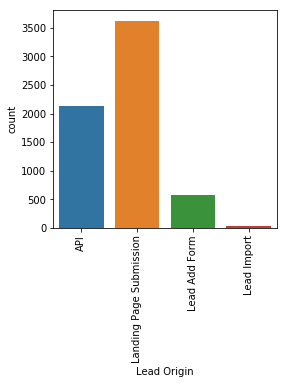

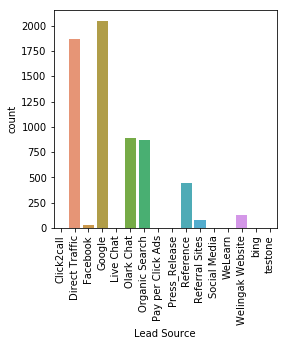

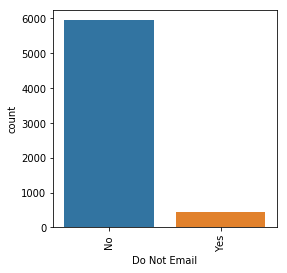

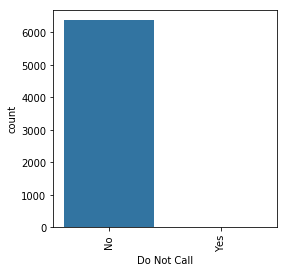

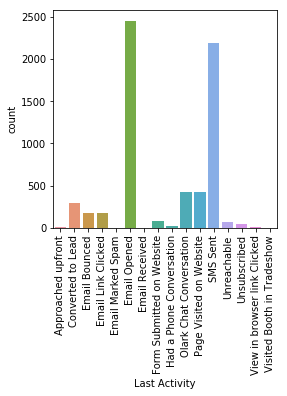

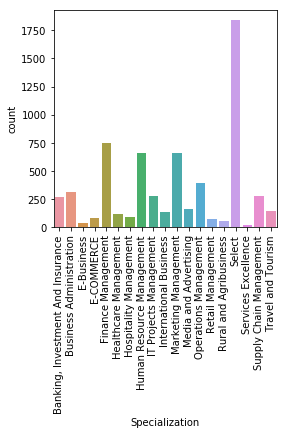

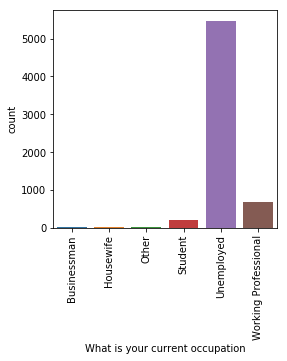

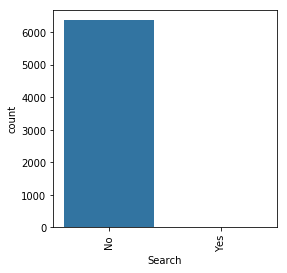

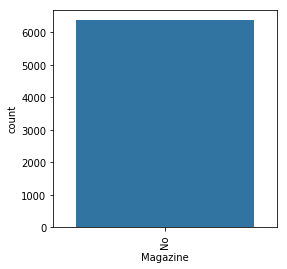

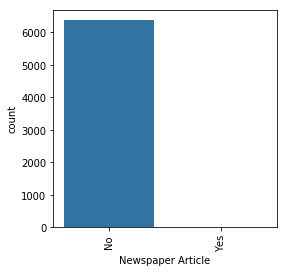

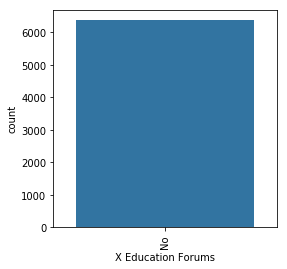

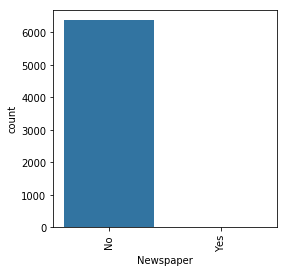

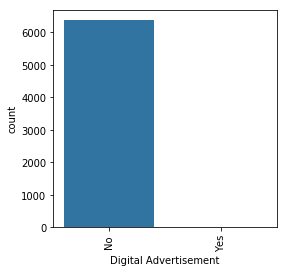

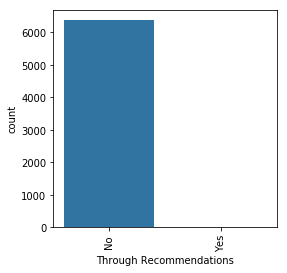

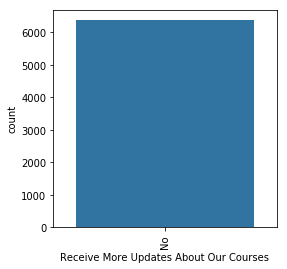

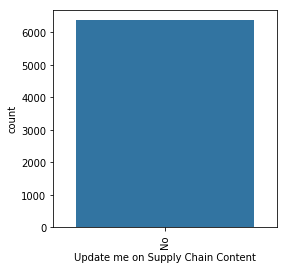

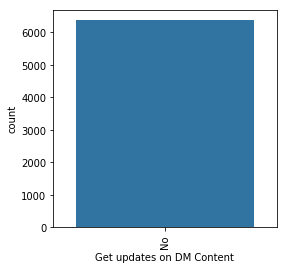

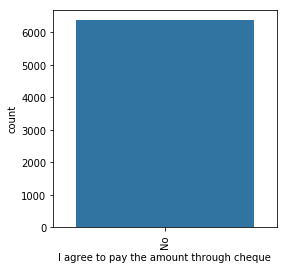

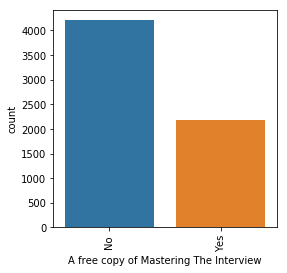

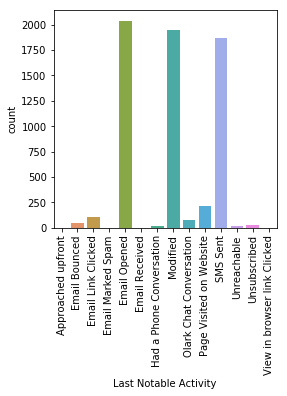

In [56]:
for col in lead.select_dtypes(include = ['category']).columns:
    fig = plt.figure(figsize = (4,4))
    #ax = fig.add_subplot(i,j,k)
    plt.title= col
    sns.countplot(lead[col])
    plt.xticks(rotation = 'vertical')
    plt.show()
        

##### From above figures, it is observed that Variables are having values either one sided values like "Yes or No" or having very high one sided values, So these variables do not be used for model building. "Do not Email", " Do not Call", "Search", "Magzine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement","Through Recommendations","Recieve More Updates About the Courses", "Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque" 

In [57]:
lead.drop(["Do Not Call", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses", "Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],axis = 1,inplace = True)

In [58]:
lead.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [59]:
lead.shape

(6373, 13)

In [60]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 13 columns):
Lead Number                               6373 non-null int64
Lead Origin                               6373 non-null category
Lead Source                               6373 non-null category
Do Not Email                              6373 non-null category
Converted                                 6373 non-null int64
TotalVisits                               6373 non-null float64
Total Time Spent on Website               6373 non-null int64
Page Views Per Visit                      6373 non-null float64
Last Activity                             6373 non-null category
Specialization                            6373 non-null category
What is your current occupation           6373 non-null category
A free copy of Mastering The Interview    6373 non-null category
Last Notable Activity                     6373 non-null category
dtypes: category(8), float64(2), int64(3)
memory usage: 672

In [61]:
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


###### Now, we can encode the categorical variables to convert them to integer values

In [62]:
for col in lead.select_dtypes(include = ['category']).columns:
    print(lead[col].value_counts())
    print('*'*70)

Landing Page Submission    3625
API                        2140
Lead Add Form               581
Lead Import                  27
Name: Lead Origin, dtype: int64
**********************************************************************
Google               2048
Direct Traffic       1873
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Social Media            2
Live Chat               2
testone                 1
WeLearn                 1
Press_Release           1
Pay per Click Ads       1
Name: Lead Source, dtype: int64
**********************************************************************
No     5938
Yes     435
Name: Do Not Email, dtype: int64
**********************************************************************
Email Opened                    2455
SMS Sent                        2189
Olark Chat Conversation          428
Page Visite

In [63]:
lead['A free copy of Mastering The Interview'] = lead[['A free copy of Mastering The Interview']].apply(lambda x:x.map({'Yes':1,'No':0}))
lead['Do Not Email'] = lead[['Do Not Email']].apply(lambda x:x.map({'Yes':1,'No':0}))

In [64]:
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,0,Modified


###### After analyzing the variable "Lead Number", it is also a unique ID and cannot be used for analysis. So, we can drop it. 

In [65]:
lead.drop(['Lead Number'],axis = 1, inplace = True)

In [66]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,0,Modified


In [67]:
# Creating dummies for categorical variables

In [68]:
lead.select_dtypes(include = ['category']).columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Last Notable Activity'], dtype='object')

In [69]:
orgin_dum = pd.get_dummies(lead['Lead Origin'],drop_first = True,prefix = 'Lead Origin')
source_dum = pd.get_dummies(lead['Lead Source'],drop_first = True,prefix = 'Lead Score')
act_dum = pd.get_dummies(lead['Last Activity'],drop_first = True,prefix = 'Last Activity')
spec_dum = pd.get_dummies(lead['Specialization'],drop_first = True,prefix = 'Specialization')
occ_dum = pd.get_dummies(lead['What is your current occupation'],drop_first = True,prefix = 'What is your current Occupation')
not_dum = pd.get_dummies(lead['Last Notable Activity'],drop_first = True,prefix = 'Last Notable Activity')

In [70]:
col_list = [lead,orgin_dum,source_dum,act_dum,spec_dum,occ_dum,not_dum]
df_lead = pd.concat(col_list,axis = 1)

In [71]:
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Score_Direct Traffic,Lead Score_Facebook,Lead Score_Google,Lead Score_Live Chat,Lead Score_Olark Chat,Lead Score_Organic Search,Lead Score_Pay per Click Ads,Lead Score_Press_Release,Lead Score_Reference,Lead Score_Referral Sites,Lead Score_Social Media,Lead Score_WeLearn,Lead Score_Welingak Website,Lead Score_bing,Lead Score_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current Occupation_Housewife,What is your current Occupation_Other,What is your current Occupation_Student,What is your current Occupation_Unemployed,What is your current Occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [72]:
df_lead.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Last Notable Activity','Specialization_Select'],axis = 1, inplace = True)

In [73]:
df_lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Score_Direct Traffic,Lead Score_Facebook,Lead Score_Google,Lead Score_Live Chat,Lead Score_Olark Chat,Lead Score_Organic Search,Lead Score_Pay per Click Ads,Lead Score_Press_Release,Lead Score_Reference,Lead Score_Referral Sites,Lead Score_Social Media,Lead Score_WeLearn,Lead Score_Welingak Website,Lead Score_bing,Lead Score_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current Occupation_Housewife,What is your current Occupation_Other,What is your current Occupation_Student,What is your current Occupation_Unemployed,What is your current Occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


###### Now, we have data after creating dummies.

In [74]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 74 columns):
Do Not Email                                            6373 non-null int64
Converted                                               6373 non-null int64
TotalVisits                                             6373 non-null float64
Total Time Spent on Website                             6373 non-null int64
Page Views Per Visit                                    6373 non-null float64
A free copy of Mastering The Interview                  6373 non-null int64
Lead Origin_Landing Page Submission                     6373 non-null uint8
Lead Origin_Lead Add Form                               6373 non-null uint8
Lead Origin_Lead Import                                 6373 non-null uint8
Lead Score_Direct Traffic                               6373 non-null uint8
Lead Score_Facebook                                     6373 non-null uint8
Lead Score_Google                                    

In [75]:
df_lead.select_dtypes(include = ['float64','int64']).columns

Index(['Do Not Email', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'A free copy of Mastering The Interview'], dtype='object')

In [76]:
# Convert converted to categorical data type
#df_lead = df_lead.astype({'Converted':'category'})

In [77]:
df_lead.select_dtypes(include = ['float64','int64']).columns

Index(['Do Not Email', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'A free copy of Mastering The Interview'], dtype='object')

In [78]:
df_lead.shape

(6373, 74)

###### Let's plot the box plots for the numerical variables to check outliers

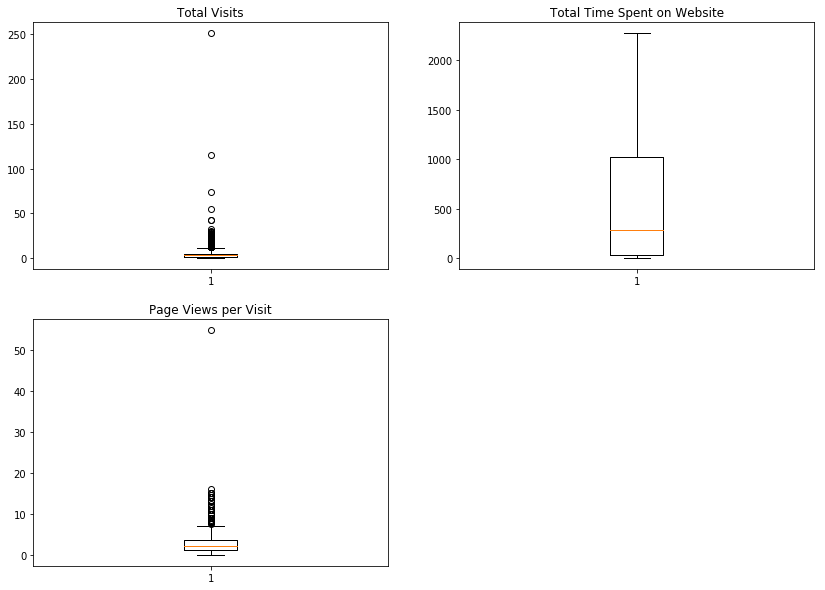

In [79]:
fig = plt.figure(figsize = (14,10))
ax1 = fig.add_subplot(2,2,1)
ax1.set(title = 'Total Visits')
plt.boxplot(df_lead['TotalVisits'])
ax2 = fig.add_subplot(2,2,2)
ax2.set(title = 'Total Time Spent on Website')
plt.boxplot(df_lead['Total Time Spent on Website'])
ax3 = fig.add_subplot(2,2,3)
ax3.set(title = 'Page Views per Visit')
plt.boxplot(df_lead['Page Views Per Visit'])
plt.show()

###### For variable "Total Visits"  has some outliers  and it requires outlier treatment otherwise it will impact the model

In [80]:
df_lead = df_lead[df_lead['TotalVisits'] < 17]

In [81]:
df_lead = df_lead[df_lead['Page Views Per Visit'] < 10]

In [82]:
# Again check for outliers after outlier treatment

In [83]:
#df_lead.head()

In [84]:
df_lead.shape

(6251, 74)

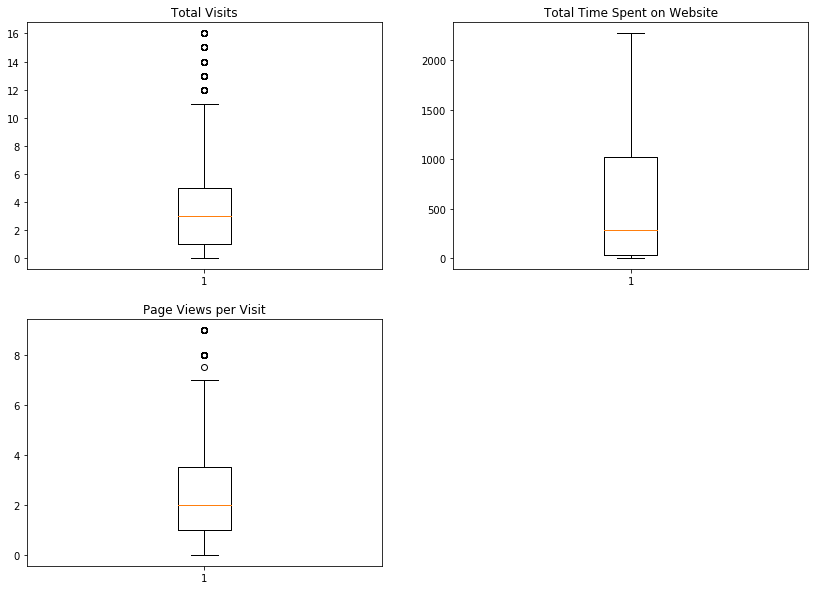

In [85]:
fig = plt.figure(figsize = (14,10))
ax1 = fig.add_subplot(2,2,1)
ax1.set(title = 'Total Visits')
plt.boxplot(df_lead['TotalVisits'])
ax2 = fig.add_subplot(2,2,2)
ax2.set(title = 'Total Time Spent on Website')
plt.boxplot(df_lead['Total Time Spent on Website'])
ax3 = fig.add_subplot(2,2,3)
ax3.set(title = 'Page Views per Visit')
plt.boxplot(df_lead['Page Views Per Visit'])
plt.show()

In [86]:
df_lead.shape

(6251, 74)

In [87]:
df_lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Score_Direct Traffic,Lead Score_Facebook,Lead Score_Google,Lead Score_Live Chat,Lead Score_Olark Chat,Lead Score_Organic Search,Lead Score_Pay per Click Ads,Lead Score_Press_Release,Lead Score_Reference,Lead Score_Referral Sites,Lead Score_Social Media,Lead Score_WeLearn,Lead Score_Welingak Website,Lead Score_bing,Lead Score_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current Occupation_Housewife,What is your current Occupation_Other,What is your current Occupation_Student,What is your current Occupation_Unemployed,What is your current Occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


##### Data-set is ready for modelling 

## Model Building ##

###### Train - test Split

In [88]:
# Import library to split data into train and test
from sklearn.model_selection import train_test_split

In [89]:
df_train,df_test = train_test_split(df_lead,train_size = 0.7,test_size = 0.3,random_state = 100)

In [90]:
print(df_train.shape)
print(df_test.shape)

(4375, 74)
(1876, 74)


###### Scaling the dataframe 

In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [92]:
scale_num_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [93]:
df_train[scale_num_var] = scaler.fit_transform(df_train[scale_num_var])

In [94]:
df_train.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Score_Direct Traffic,Lead Score_Facebook,Lead Score_Google,Lead Score_Live Chat,Lead Score_Olark Chat,Lead Score_Organic Search,Lead Score_Pay per Click Ads,Lead Score_Press_Release,Lead Score_Reference,Lead Score_Referral Sites,Lead Score_Social Media,Lead Score_WeLearn,Lead Score_Welingak Website,Lead Score_bing,Lead Score_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current Occupation_Housewife,What is your current Occupation_Other,What is your current Occupation_Student,What is your current Occupation_Unemployed,What is your current Occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2372,0,1,0.1250,0.011444,0.222222,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7565,0,1,0.1250,0.110915,0.111111,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4464,0,0,0.1875,0.082306,0.166667,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1550,0,1,0.0000,0.000000,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7952,0,1,0.3125,0.745599,0.555556,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [95]:
df_train.columns

Index(['Do Not Email', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'A free copy of Mastering The Interview', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Score_Direct Traffic', 'Lead Score_Facebook', 'Lead Score_Google', 'Lead Score_Live Chat', 'Lead Score_Olark Chat', 'Lead Score_Organic Search', 'Lead Score_Pay per Click Ads', 'Lead Score_Press_Release', 'Lead Score_Reference', 'Lead Score_Referral Sites', 'Lead Score_Social Media', 'Lead Score_WeLearn', 'Lead Score_Welingak Website', 'Lead Score_bing', 'Lead Score_testone', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam', 'Last Activity_Email Opened', 'Last Activity_Email Received', 'Last Activity_Form Submitted on Website', 'Last Activity_Had a Phone Conversation', 'Last Activity_Olark Chat Conversation', 'Last Activity_Page Visited on Website',
      

###### Let's check the cor-relation 

In [96]:
train_corr = df_train.corr()
train_corr

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Score_Direct Traffic,Lead Score_Facebook,Lead Score_Google,Lead Score_Live Chat,Lead Score_Olark Chat,Lead Score_Organic Search,Lead Score_Pay per Click Ads,Lead Score_Press_Release,Lead Score_Reference,Lead Score_Referral Sites,Lead Score_Social Media,Lead Score_WeLearn,Lead Score_Welingak Website,Lead Score_bing,Lead Score_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current Occupation_Housewife,What is your current Occupation_Other,What is your current Occupation_Student,What is your current Occupation_Unemployed,What is your current Occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Do Not Email,1.000000,-0.145161,-0.005526,-0.056823,0.021210,0.045693,0.086391,-0.028850,-0.017727,0.084562,-0.018189,-0.059081,-0.005740,-0.034069,0.035477,NaN,0.056334,-0.041212,-0.019114,NaN,-0.004058,0.018454,-0.007031,-0.004058,-0.054045,0.597911,-0.029082,NaN,-0.207621,-0.005740,-0.022787,-0.014653,-0.043752,0.033339,0.004518,0.016309,0.264317,-0.005740,-0.004058,-0.007125,0.011827,0.031264,-0.010221,0.025307,0.015448,-0.014991,0.057052,-0.002562,-0.025482,0.004785,0.003902,0.016782,0.014231,0.044235,-0.018045,0.051242,-0.008120,0.007963,-0.008009,0.044344,-0.045167,0.348744,-0.027544,NaN,-0.179330,-0.004058,-0.011488,0.064690,0.004872,0.038551,0.007258,-0.016261,0.246061,-0.004058
Converted,-0.145161,1.000000,0.008200,0.311547,-0.072060,-0.095828,-0.127292,0.284728,-0.008394,-0.140976,-0.011468,0.020401,0.022056,-0.037018,-0.033799,NaN,-0.014661,0.239228,-0.021184,NaN,0.015594,0.143905,-0.007927,-0.014661,-0.145096,-0.134153,-0.043169,NaN,-0.029149,0.022056,-0.034769,0.056303,-0.153860,-0.083922,0.289262,-0.016747,-0.021415,-0.020736,-0.014661,0.007897,-0.005933,-0.022498,0.026178,0.019643,-0.000292,0.021025,-0.001089,-0.009441,0.039497,-0.005475,0.039766,-0.020415,0.017676,-0.013283,-0.008749,-0.006066,0.031199,0.006449,-0.041174,-0.247238,0.296309,-0.051328,-0.028361,NaN,-0.015391,0.015594,0.044143,-0.229090,-0.028605,-0.030804,0.279408,0.047331,-0.015349,-0.014661
TotalVisits,-0.005526,0.008200,1.000000,0.338455,0.705943,0.275902,0.407789,-0.335759,-0.065642,0.107065,-0.063129,0.189632,-0.024393,-0.399678,0.285842,NaN,0.014366,-0.294107,0.072742,NaN,-0.006709,-0.152290,-0.005538,0.0090

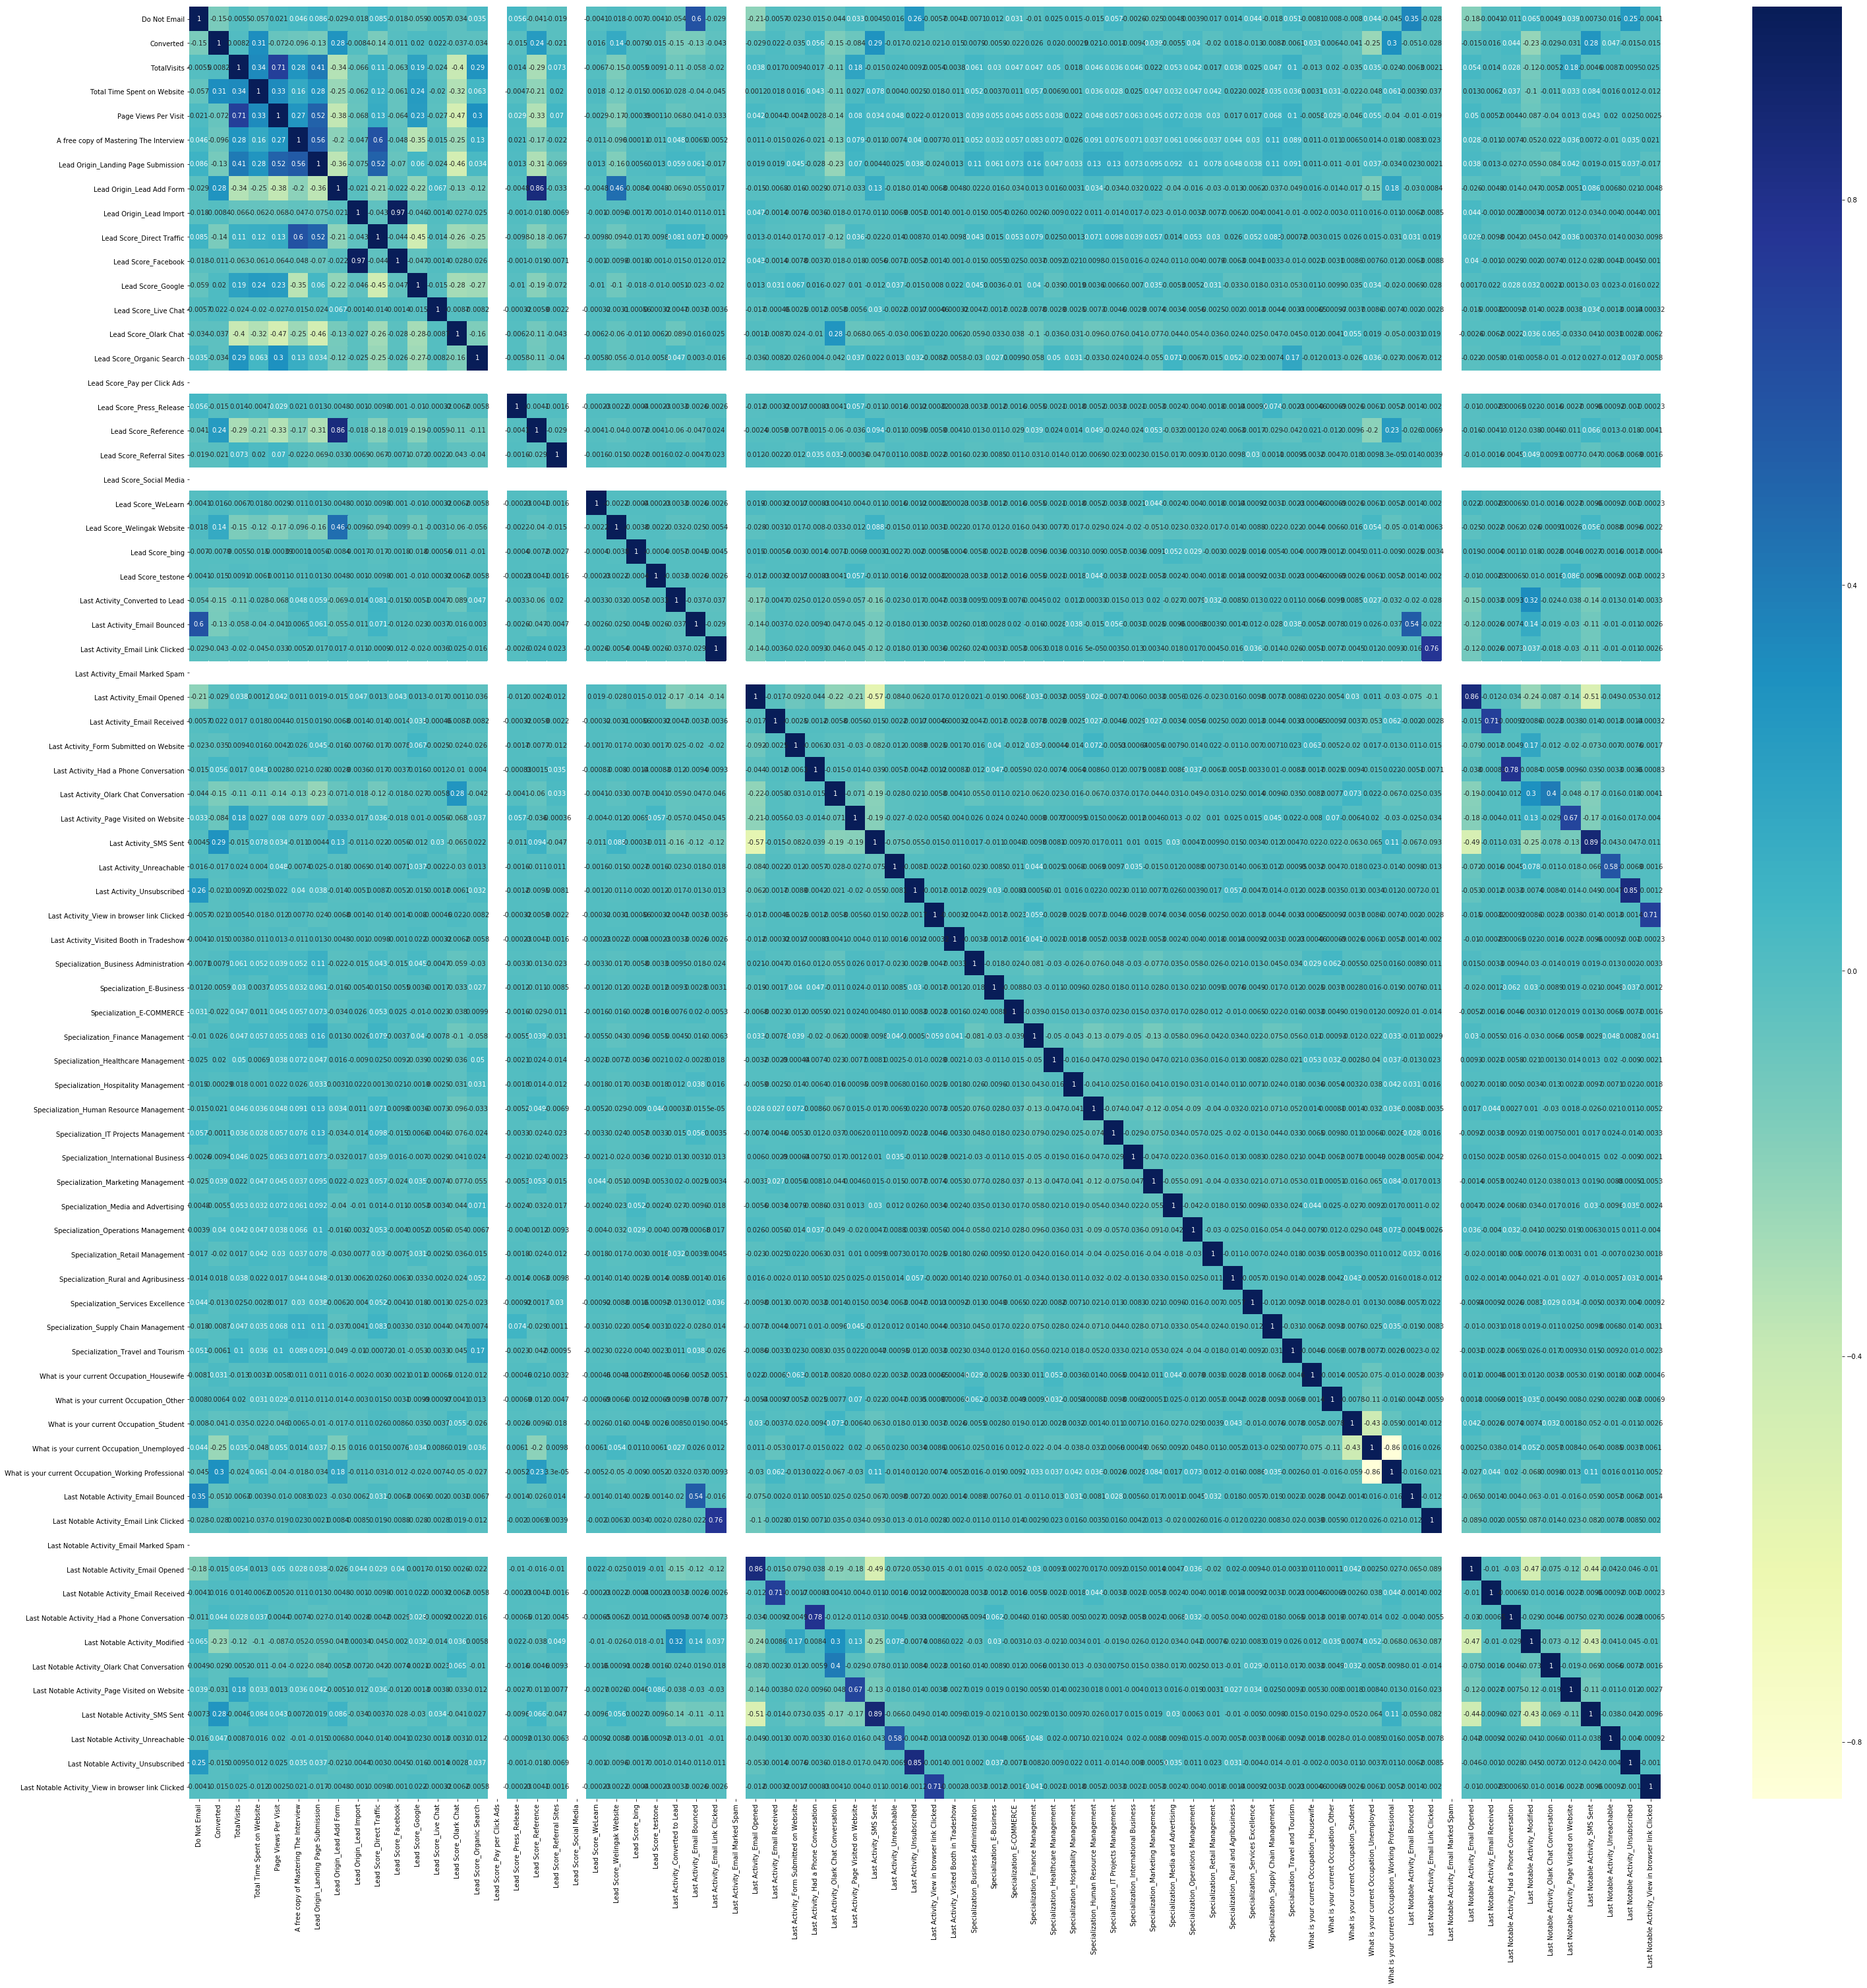

In [97]:
# Heat map to see the co-relation  between the variables
plt.figure(figsize = (50, 50))
sns.heatmap(train_corr, annot = True, cmap="YlGnBu")
plt.show()

In [98]:
# Lets Check the co-reltatin of numerical variables only
train_corr_num = df_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']].corr()

In [99]:
train_corr_num

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
TotalVisits,1.000000,0.705943,0.338455
Page Views Per Visit,0.705943,1.000000,0.330752
Total Time Spent on Website,0.338455,0.330752,1.000000


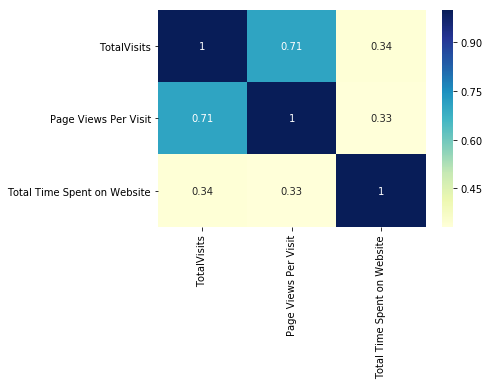

In [100]:
# Heat map to see the co-relation  between the variables
sns.heatmap(train_corr_num, annot = True, cmap="YlGnBu")
plt.show()

##### Here we can see that "TotalVisits" and "Page Views Per Visit" are somehow highly co-releated with 71 %age

##### Lead conversion rate

In [101]:
Conversion_rate = 100*(sum(df_lead['Converted'])/len(df_lead.index))

In [102]:
Conversion_rate

48.08830587106063

######  Lets now, convert the train data to x_train and Y_train data.

In [103]:
y_train = df_train.pop('Converted')
X_train = df_train

In [104]:
y_train.head()

2372    1
7565    1
4464    0
1550    1
7952    1
Name: Converted, dtype: int64

##### Lets first build the model using all the variables and lets see what we get

In [105]:
import statsmodels.api as sm

In [106]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4375 entries, 2372 to 8382
Data columns (total 73 columns):
Do Not Email                                            4375 non-null int64
TotalVisits                                             4375 non-null float64
Total Time Spent on Website                             4375 non-null float64
Page Views Per Visit                                    4375 non-null float64
A free copy of Mastering The Interview                  4375 non-null int64
Lead Origin_Landing Page Submission                     4375 non-null uint8
Lead Origin_Lead Add Form                               4375 non-null uint8
Lead Origin_Lead Import                                 4375 non-null uint8
Lead Score_Direct Traffic                               4375 non-null uint8
Lead Score_Facebook                                     4375 non-null uint8
Lead Score_Google                                       4375 non-null uint8
Lead Score_Live Chat                            

### Logistic Regression Model 

In [107]:
# Add a constant first
X_train_sm = sm.add_constant(X_train)
logml = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
logml.fit().summary()
# logistic regression model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4375
Model:                            GLM   Df Residuals:                     4306
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Oct 2019   Deviance:                          nan
Time:                        19:51:35   Pearson chi2:                 5.62e+18
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 3.632e+15   7.27e+07   4.99e+07      0.000    3.63e+15    3.63e+15
Do Not Email                                         -8.852e+14   5.57e+06  -1.59e+08      0.000   -8.85e+14   -8.85e+14
TotalVisits                                           8.476e+14    8.6e+06   9.85e+07      0.000    8.48e+14    8.48e+14
Total Time Spent on Website                           9.172e+14   4.66e+06   1.97e+08      0.000    9.17e+14    9.17e+14
Page Views Per Visit                                 -5.004e+13   8.13e+06  -6.16e+06      0.000      -5e+13      -5e+13
A free copy of Mastering The Interview                2.361e+14   3.12e+06   7.56e+07      0.000    2.36e+14    2.36e+14
Lead Origin_Landing Page Submission                  -4.657e+14   3.67e+06  -1.27e+08      0.000   -4.66e+14   -4.66e+14
Lead Origin_Lead Add Form                             4.039e+14   4.77e+07   8.47e+06      0.000    4.04e+14    4.04e+14
Lead Origin_Lead Import                               5.339e+15   6.92e+07   7.72e+07      0.000    5.34e+15    5.34e+15
Lead Score_Direct Traffic                            -7.066e+13   5.85e+07  -1.21e+06      0.000   -7.07e+13   -7.07e+13
Lead Score_Facebook                                  -5.808e+15   8.92e+07  -6.51e+07      0.000   -5.81e+15   -5.81e+15
Lead Score_Google                                    -1.783e+14   5.85e+07  -3.05e+06      0.000   -1.78e+14   -1.78e+14
Lead Score_Live Chat                                  5.287e+15   5.83e+07   9.07e+07      0.000    5.29e+15    5.29e+15
Lead Score_Olark Chat                                  2.83e+14   5.83e+07   4.85e+06      0.000    2.83e+14    2.83e+14
Lead Score_Organic Search                            -1.473e+14   5.85e+07  -2.52e+06      0.000   -1.47e+14   -1.47e+14
Lead Score_Pay per Click Ads                           277.8616    2.9e-06   9.58e+07      0.000     277.862     277.862
Lead Score_Press_Release                             -2.262e+15   8.97e+07  -2.52e+07      0.000   -2.26e+15   -2.26e+15
Lead Score_Reference                                  3.058e+14    3.4e+07      9e+06      0.000    3.06e+14    3.06e+14
Lead Score_Referral Sites                            -5.057e+14   5.93e+07  -8.53e+06      0.000   -5.06e+14   -5.06e+14
Lead Score_Social Media                                 31.4916   8.11e-07   3.88e+07      0.000      31.492      31.492
Lead Score_WeLearn                                    5.575e+15   8.92e+07   6.25e+07      0.000    5.58e+15    5.58e+15
Lead Score_Welingak Website                           1.487e+15   3.45e+07   4.31e+07      0.000    1.49e+15    1.49e+15
Lead Score_bing                                      -1.153e+15   7.02e+07  -1.64e+07      0.000   -1.15e+15   -1.15e+15
Lead Score_testo

###### Lets reduce the variables using RFE 

In [108]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [109]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train,y_train)

In [110]:
rfe.support_

array([ True,  True,  True, False, False, False,  True, False,  True,
       False,  True, False, False,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False])

In [111]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('A free copy of Mastering The Interview', False, 46),
 ('Lead Origin_Landing Page Submission', False, 25),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('Lead Score_Direct Traffic', True, 1),
 ('Lead Score_Facebook', False, 48),
 ('Lead Score_Google', True, 1),
 ('Lead Score_Live Chat', False, 37),
 ('Lead Score_Olark Chat', False, 12),
 ('Lead Score_Organic Search', True, 1),
 ('Lead Score_Pay per Click Ads', False, 58),
 ('Lead Score_Press_Release', False, 52),
 ('Lead Score_Reference', False, 11),
 ('Lead Score_Referral Sites', True, 1),
 ('Lead Score_Social Media', False, 59),
 ('Lead Score_WeLearn', False, 39),
 ('Lead Score_Welingak Website', True, 1),
 ('Lead Score_bing', False, 47),
 ('Lead Score_testone', False, 36),
 ('Last Activity_Converted to Lead', False, 3),
 ('Last Activity_Email Bounced', False, 5

In [112]:
col_rfe = X_train.columns[rfe.support_]

In [113]:
col_rfe

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Score_Direct Traffic', 'Lead Score_Google', 'Lead Score_Organic Search', 'Lead Score_Referral Sites', 'Lead Score_Welingak Website', 'Last Activity_Had a Phone Conversation', 'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'What is your current Occupation_Housewife', 'What is your current Occupation_Working Professional', 'Last Notable Activity_Unreachable'], dtype='object')

In [114]:
# now lets build the model on RFE support columns

In [115]:
X_train_sm = sm.add_constant(X_train[col_rfe])
logm1 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm1.fit().summary()
res

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4375
Model:                            GLM   Df Residuals:                     4359
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.7
Date:                Mon, 07 Oct 2019   Deviance:                       4047.4
Time:                        19:51:39   Pearson chi2:                 4.51e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6234      0.100     -6.223      0.000      -0.820      -0.427
Do Not Email                                            -1.4094      0.192     -7.341      0.000      -1.786      -1.033
TotalVisits                                              1.5799      0.276      5.734      0.000       1.040       2.120
Total Time Spent on Website                              4.4942      0.192     23.432      0.000       4.118       4.870
Lead Origin_Lead Add Form                                2.0972      0.234      8.973      0.000       1.639       2.555
Lead Score_Direct Traffic                               -2.1052      0.146    -14.421      0.000      -2.391      -1.819
Lead Score_Google                                       -1.6714      0.143    -11.657      0.000      -1.952      -1.390
Lead Score_Organic Search                               -1.8912      0.175    -10.834      0.000      -2.233      -1.549
Lead Score_Referral Sites                               -1.9039      0.403     -4.720      0.000      -2.694      -1.113
Lead Score_Welingak Website                              1.8200      0.751      2.423      0.015       0.348       3.292
Last Activity_Had a Phone Conversation                  23.3492   1.81e+04      0.001      0.999   -3.54e+04    3.54e+04
Last Activity_Olark Chat Conversation                   -0.9997      0.175     -5.699      0.000      -1.344      -0.656
Last Activity_SMS Sent                                   1.1782      0.085     13.889      0.000       1.012       1.344
What is your current Occupation_Housewife               23.8410   3.76e+04      0.001      0.999   -7.37e+04    7.37e+04
What is your current Occupation_Working Professional     2.4153      0.185     13.072      0.000       2.053       2.777
Last Notable Activity_Unreachable                        2.5282      0.833      3.037      0.002       0.896       4.160
========================================================================================================================
"""

##### We have high p-value for some variables 

###### Lets Check the VIF first and will analyze both the parameters

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [117]:
vif = pd.DataFrame()
vif['Features'] = X_train[col_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_rfe].values,i) for i in range(X_train[col_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,TotalVisits,3.59
5,Lead Score_Google,2.63
2,Total Time Spent on Website,2.47
4,Lead Score_Direct Traffic,2.27
6,Lead Score_Organic Search,1.90
11,Last Activity_SMS Sent,1.53
3,Lead Origin_Lead Add Form,1.50
8,Lead Score_Welingak Website,1.33
13,What is your current Occupation_Working Profes...,1.20
0,Do Not Email,1.09


##### Here, We can see that all VIF values are less than 5 and so, we need to drop variables based on p-value to get them below 0.05

###### Lets drop the variable "What is your current occupation_Housewife" which have p-value 0.999

In [118]:
X_train = X_train[col_rfe]

In [119]:
X_train.drop(['What is your current Occupation_Housewife'],axis = 1,inplace = True)

In [120]:
# Again build the model and will check the p-value and VIF

In [121]:
X_train.shape

(4375, 14)

In [122]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res2 = logm2.fit().summary()
res2

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4375
Model:                            GLM   Df Residuals:                     4360
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2027.1
Date:                Mon, 07 Oct 2019   Deviance:                       4054.1
Time:                        19:51:40   Pearson chi2:                 4.52e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6208      0.100     -6.199      0.000      -0.817      -0.425
Do Not Email                                            -1.4118      0.192     -7.356      0.000      -1.788      -1.036
TotalVisits                                              1.5662      0.275      5.688      0.000       1.027       2.106
Total Time Spent on Website                              4.4959      0.192     23.442      0.000       4.120       4.872
Lead Origin_Lead Add Form                                2.1050      0.234      9.011      0.000       1.647       2.563
Lead Score_Direct Traffic                               -2.0990      0.146    -14.394      0.000      -2.385      -1.813
Lead Score_Google                                       -1.6634      0.143    -11.615      0.000      -1.944      -1.383
Lead Score_Organic Search                               -1.8871      0.174    -10.817      0.000      -2.229      -1.545
Lead Score_Referral Sites                               -1.9008      0.403     -4.714      0.000      -2.691      -1.110
Lead Score_Welingak Website                              1.8127      0.751      2.414      0.016       0.341       3.285
Last Activity_Had a Phone Conversation                  23.3452   1.81e+04      0.001      0.999   -3.54e+04    3.54e+04
Last Activity_Olark Chat Conversation                   -1.0036      0.175     -5.722      0.000      -1.347      -0.660
Last Activity_SMS Sent                                   1.1728      0.085     13.835      0.000       1.007       1.339
What is your current Occupation_Working Professional     2.4112      0.185     13.052      0.000       2.049       2.773
Last Notable Activity_Unreachable                        2.5218      0.833      3.029      0.002       0.890       4.154
========================================================================================================================
"""

In [123]:
# Check the VIF value

In [124]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,TotalVisits,3.59
5,Lead Score_Google,2.63
2,Total Time Spent on Website,2.47
4,Lead Score_Direct Traffic,2.27
6,Lead Score_Organic Search,1.90
11,Last Activity_SMS Sent,1.53
3,Lead Origin_Lead Add Form,1.50
8,Lead Score_Welingak Website,1.33
12,What is your current Occupation_Working Profes...,1.20
0,Do Not Email,1.09


###### We have high p-value of "Last Activity_Had a Phone Conversation", drop the variable

In [125]:
X_train.drop(['Last Activity_Had a Phone Conversation'],1,inplace = True)

In [126]:
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Score_Direct Traffic', 'Lead Score_Google', 'Lead Score_Organic Search', 'Lead Score_Referral Sites', 'Lead Score_Welingak Website', 'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'What is your current Occupation_Working Professional', 'Last Notable Activity_Unreachable'], dtype='object')

In [127]:
X_train.shape

(4375, 13)

##### Again build the model and check the p-value and VIF values

In [128]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4375
Model:                            GLM   Df Residuals:                     4361
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2034.7
Date:                Mon, 07 Oct 2019   Deviance:                       4069.4
Time:                        19:51:40   Pearson chi2:                 4.53e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6158      0.100     -6.154      0.000      -0.812      -0.420
Do Not Email                                            -1.4180      0.192     -7.390      0.000      -1.794      -1.042
TotalVisits                                              1.5738      0.274      5.735      0.000       1.036       2.112
Total Time Spent on Website                              4.4971      0.191     23.504      0.000       4.122       4.872
Lead Origin_Lead Add Form                                2.1120      0.233      9.047      0.000       1.654       2.569
Lead Score_Direct Traffic                               -2.0974      0.146    -14.397      0.000      -2.383      -1.812
Lead Score_Google                                       -1.6570      0.143    -11.592      0.000      -1.937      -1.377
Lead Score_Organic Search                               -1.8769      0.174    -10.789      0.000      -2.218      -1.536
Lead Score_Referral Sites                               -1.8649      0.396     -4.711      0.000      -2.641      -1.089
Lead Score_Welingak Website                              1.8077      0.751      2.407      0.016       0.336       3.279
Last Activity_Olark Chat Conversation                   -1.0134      0.175     -5.778      0.000      -1.357      -0.670
Last Activity_SMS Sent                                   1.1617      0.085     13.719      0.000       0.996       1.328
What is your current Occupation_Working Professional     2.4113      0.185     13.069      0.000       2.050       2.773
Last Notable Activity_Unreachable                        2.5111      0.833      3.016      0.003       0.879       4.143
========================================================================================================================
"""

In [129]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,TotalVisits,3.59
5,Lead Score_Google,2.63
2,Total Time Spent on Website,2.47
4,Lead Score_Direct Traffic,2.27
6,Lead Score_Organic Search,1.90
10,Last Activity_SMS Sent,1.53
3,Lead Origin_Lead Add Form,1.50
8,Lead Score_Welingak Website,1.33
11,What is your current Occupation_Working Profes...,1.20
0,Do Not Email,1.09


###### Now, we have all p -values less than 0.05 and VIF values less than 5.

### Model Prediction and Evaluation 

In [130]:
y_train_pred = res3.predict(X_train_sm)
y_train_pred[:10]

2372    0.296735
7565    0.899498
4464    0.390347
1550    0.816998
7952    0.828076
2855    0.133649
5925    0.044347
9031    0.858517
7223    0.045241
157     0.488641
dtype: float64

In [131]:
# Reshape the array

In [132]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.29673532, 0.89949821, 0.39034694, 0.81699795, 0.82807605,
       0.13364948, 0.04434737, 0.85851732, 0.04524103, 0.48864063])

###### Adding the Converted column to the array and create a dataframe

In [133]:
y_train_pred_result = pd.DataFrame({'Converted':y_train.values,'Convert_prob':y_train_pred})
y_train_pred_result.head()

,Converted,Convert_prob
0,1,0.296735
1,1,0.899498
2,0,0.390347
3,1,0.816998
4,1,0.828076


In [134]:
y_train_pred_result['Predicted'] = y_train_pred_result['Convert_prob'].apply(lambda x:1 if x > 0.5 else 0)
y_train_pred_result.head()

,Converted,Convert_prob,Predicted
0,1,0.296735,0
1,1,0.899498,1
2,0,0.390347,0
3,1,0.816998,1
4,1,0.828076,1


##### Confusion metrics

In [135]:
from sklearn import metrics

In [136]:
confusion = metrics.confusion_matrix(y_train_pred_result.Converted,y_train_pred_result.Predicted)

In [137]:
confusion

array([[1860,  395],
       [ 537, 1583]], dtype=int64)

In [138]:
print(confusion)

[[1860  395]
 [ 537 1583]]


In [139]:
# Precicted        Not Converted Converted
# Actual            1866           389 
# not Converted      516           1604
# Converted

In [140]:
# Check the Accuracy

In [141]:
print(metrics.accuracy_score(y_train_pred_result.Converted,y_train_pred_result.Predicted))

0.7869714285714285


## Check the Sensitivity and Specificity

In [142]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [143]:
# lets see the sensitivity of our logisitc model
TP / float(TP+FN)

0.7466981132075472

In [144]:
# lets calculate the specificity
TN / float(TN+FP)

0.8248337028824834

In [145]:
# Calculate False positive rate
print(FP/float(TN+FP))

0.17516629711751663


In [146]:
# positive predicted value
print(TP/ float(TP+FP))

0.8003033367037411


In [147]:
# negative predicted value 
print(TN / float(TN+FN))

0.7759699624530664


## ROC Curve ##

In [148]:
def draw_ROC(actual,probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize = (5,5))
    plt.plot(fpr,tpr,label = 'ROC Curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False positive Rate or [1-True negative rate]')
    plt.ylabel('True positive rate')
    #plt.title('Reciever operating charachterstic example')
    plt.legend(loc = 'lower right')
    plt.show()
    return None

In [149]:
fpr,tpr,thresholds = metrics.roc_curve(y_train_pred_result.Converted,y_train_pred_result.Convert_prob)

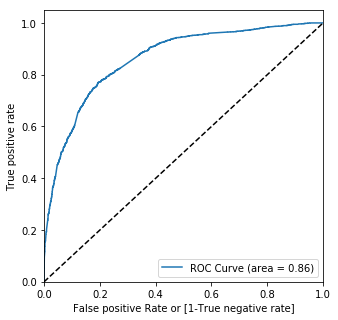

In [150]:
draw_ROC(y_train_pred_result.Converted,y_train_pred_result.Convert_prob)

In [151]:
# Area under curve is 0.86

##### Finding the optimal Cut-off

##### Optimal cut off probability is that prob where we get the balanced sensitivity and specificity

In [152]:
# Columns with different probability cut offs

In [153]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_result[i] = y_train_pred_result.Convert_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_result.head()

,Converted,Convert_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.296735,0,1,1,1,0,0,0,0,0,0,0
1,1,0.899498,1,1,1,1,1,1,1,1,1,1,0
2,0,0.390347,0,1,1,1,1,0,0,0,0,0,0
3,1,0.816998,1,1,1,1,1,1,1,1,1,1,0
4,1,0.828076,1,1,1,1,1,1,1,1,1,1,0


In [154]:
df_cutoff = pd.DataFrame(columns = ['probab','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_result.Converted,y_train_pred_result[i])
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    df_cutoff.loc[i] = [i,accuracy,sensi,speci]
df_cutoff
    

,probab,accuracy,sensi,speci
0.0,0.0,0.484571,1.000000,0.000000
0.1,0.1,0.551314,0.989623,0.139246
0.2,0.2,0.714971,0.946226,0.497561
0.3,0.3,0.757943,0.900943,0.623503
0.4,0.4,0.781943,0.798585,0.766297
0.5,0.5,0.786971,0.746698,0.824834
0.6,0.6,0.773943,0.676415,0.865632
0.7,0.7,0.739429,0.550000,0.917517
0.8,0.8,0.712229,0.461792,0.947672
0.9,0.9,0.642514,0.283019,0.980488


In [155]:
# Plot the cut of point

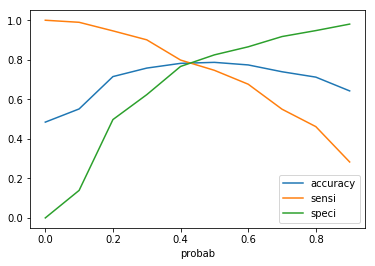

In [156]:
df_cutoff.plot.line(x = 'probab',y=['accuracy','sensi','speci'])
plt.show()

### From the above ROC curve, we got a cut off value between 0.4 and 0.5, we will take it as 0.45.

In [157]:
y_train_pred_result['Predicted'] = y_train_pred_result['Convert_prob'].apply(lambda x:1 if x>0.45 else 0)
y_train_pred_result.head()

,Converted,Convert_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.296735,0,1,1,1,0,0,0,0,0,0,0
1,1,0.899498,1,1,1,1,1,1,1,1,1,1,0
2,0,0.390347,0,1,1,1,1,0,0,0,0,0,0
3,1,0.816998,1,1,1,1,1,1,1,1,1,1,0
4,1,0.828076,1,1,1,1,1,1,1,1,1,1,0


##### Confusion matrix

In [158]:
confusion = metrics.confusion_matrix(y_train_pred_result.Converted,y_train_pred_result.Predicted)

In [159]:
confusion

array([[1805,  450],
       [ 482, 1638]], dtype=int64)

In [160]:
print(confusion)

[[1805  450]
 [ 482 1638]]


In [161]:
# Check Accuracy

In [162]:
print(metrics.accuracy_score(y_train_pred_result.Converted,y_train_pred_result.Predicted))

0.7869714285714285


In [163]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [164]:
# Sensitvity
TP / float(TP+FN)

0.7726415094339623

In [165]:
# Specificity
TN / float(TN+FP)

0.8004434589800443

In [166]:
# false Positive rate
print(FP/float(TN+FP))

0.19955654101995565


In [167]:
# positive predicted value
print(TP/ float(TP+FP))

0.7844827586206896


In [168]:
# negative predicted value 
print(TN / float(TN+FN))

0.7892435505028421


In [169]:
final_cutoff_df = pd.DataFrame()
total1 = sum(sum(confusion))
accuracy = (confusion[0,0] + confusion[1,1])/total1    
speci = confusion[0,0]/(confusion[0,0]+confusion[0,1])
sensi = confusion[1,1]/(confusion[1,0]+confusion[1,1])
final_cutoff_df = [accuracy,sensi,speci]
final_cutoff_df

[0.7869714285714285, 0.7726415094339623, 0.8004434589800443]

### Adding new variable Lead Score between 0-100 and on the basis of that leads are communicated

In [170]:
y_train_pred_result.head()

,Converted,Convert_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.296735,0,1,1,1,0,0,0,0,0,0,0
1,1,0.899498,1,1,1,1,1,1,1,1,1,1,0
2,0,0.390347,0,1,1,1,1,0,0,0,0,0,0
3,1,0.816998,1,1,1,1,1,1,1,1,1,1,0
4,1,0.828076,1,1,1,1,1,1,1,1,1,1,0


In [171]:
y_train_pred_result['Lead Score'] = y_train_pred_result['Convert_prob'].map(lambda x: round(x*100))

In [172]:
y_train_pred_result.head()

,Converted,Convert_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Lead Score
0,1,0.296735,0,1,1,1,0,0,0,0,0,0,0,30
1,1,0.899498,1,1,1,1,1,1,1,1,1,1,0,90
2,0,0.390347,0,1,1,1,1,0,0,0,0,0,0,39
3,1,0.816998,1,1,1,1,1,1,1,1,1,1,0,82
4,1,0.828076,1,1,1,1,1,1,1,1,1,1,0,83


### Prections on Test data-set

In [173]:
df_test.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Score_Direct Traffic,Lead Score_Facebook,Lead Score_Google,Lead Score_Live Chat,Lead Score_Olark Chat,Lead Score_Organic Search,Lead Score_Pay per Click Ads,Lead Score_Press_Release,Lead Score_Reference,Lead Score_Referral Sites,Lead Score_Social Media,Lead Score_WeLearn,Lead Score_Welingak Website,Lead Score_bing,Lead Score_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current Occupation_Housewife,What is your current Occupation_Other,What is your current Occupation_Student,What is your current Occupation_Unemployed,What is your current Occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7132,0,1,2.0,1248,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3176,0,1,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4151,0,1,6.0,1212,3.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4709,0,0,1.0,45,1.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1964,0,0,3.0,82,3.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [174]:
df_test.shape

(1876, 74)

In [175]:
# Scale the variables of test data-set

In [176]:
y_test = df_test.pop('Converted')
X_test = df_test

In [177]:
X_test[scale_num_var] = scaler.transform(X_test[scale_num_var])

In [178]:
# Pass the columns which are present in the final model of train data-set

In [179]:
col_final = X_train.columns

In [180]:
col_final

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Score_Direct Traffic', 'Lead Score_Google', 'Lead Score_Organic Search', 'Lead Score_Referral Sites', 'Lead Score_Welingak Website', 'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'What is your current Occupation_Working Professional', 'Last Notable Activity_Unreachable'], dtype='object')

In [181]:
X_test = X_test[col_final]

In [182]:
X_test.shape

(1876, 13)

In [183]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Score_Direct Traffic,Lead Score_Google,Lead Score_Organic Search,Lead Score_Referral Sites,Lead Score_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current Occupation_Working Professional,Last Notable Activity_Unreachable
7132,0,0.1250,0.549296,0,0,0,1,0,0,0,0,0,0
3176,0,0.0000,0.000000,1,0,0,0,0,0,0,0,0,0
4151,0,0.3750,0.533451,0,0,1,0,0,0,0,1,0,0
4709,0,0.0625,0.019806,0,1,0,0,0,0,0,0,0,0
1964,0,0.1875,0.036092,0,0,0,1,0,0,0,0,0,0


In [184]:
# add constant first for prediction

In [185]:
X_test_sm = sm.add_constant(X_test)

In [186]:
# Predict y__test_pred

In [187]:
y_test_pred = res3.predict(X_test_sm)

In [188]:
y_test_pred[:10]

7132    0.543449
3176    0.816998
4151    0.867390
4709    0.074073
1964    0.115543
5293    0.993928
9093    0.355426
8779    0.076791
4459    0.069793
5844    0.564907
dtype: float64

In [189]:
# Converting the data to dataframe
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
7132,0.543449
3176,0.816998
4151,0.867390
4709,0.074073
1964,0.115543


In [190]:
y_test

7132    1
3176    1
4151    1
4709    0
1964    0
5293    1
9093    1
8779    0
4459    0
5844    0
6826    1
2405    1
8432    1
5720    1
7193    1
6004    0
8438    0
2816    0
6653    1
6397    0
3521    1
1193    1
5735    0
4847    1
3877    0
8139    0
6017    1
3024    1
4649    0
854     1
4326    0
8403    1
1275    0
479     0
4301    0
2870    1
5239    0
7455    1
5282    0
28      0
8356    0
6226    0
2012    1
911     0
4189    0
818     1
7423    1
6488    0
3297    0
1156    0
416     0
6728    1
8577    0
8137    0
8045    0
576     1
1932    1
2403    1
4216    1
7386    0
8781    0
8219    1
5660    0
4784    1
7382    0
2882    1
8357    0
7653    1
741     0
1906    0
8116    0
2960    1
4332    0
4940    1
2788    0
3172    1
5272    1
5175    1
163     1
2665    1
304     0
4378    1
7896    0
5310    0
5451    1
5949    0
6423    1
1883    1
1282    0
2107    1
2010    1
2672    1
8237    1
1825    0
8814    0
3240    0
1015    1
3012    1
7548    1
8852    0


In [191]:
# Now Converting the y_test to dataframe
df_y_test = pd.DataFrame(y_test)

In [192]:
df_y_test['ID'] = df_y_test.index

In [193]:
# Remove index and concat both the dataframes

In [194]:
y_test_pred.reset_index(drop = True,inplace = True)
df_y_test.reset_index(drop = True,inplace = True)

In [195]:
# concat the dataframes
y_pred_result = pd.concat([df_y_test,y_test_pred],axis = 1)
y_pred_result.head()

,Converted,ID,0
0,1,7132,0.543449
1,1,3176,0.816998
2,1,4151,0.867390
3,0,4709,0.074073
4,0,1964,0.115543


In [196]:
# Rename the column name 0
y_pred_result = y_pred_result.rename(columns={ 0 : 'Convert_Prob'})

In [197]:
y_pred_result.head()

,Converted,ID,Convert_Prob
0,1,7132,0.543449
1,1,3176,0.816998
2,1,4151,0.867390
3,0,4709,0.074073
4,0,1964,0.115543


In [198]:
# Rearangeing the columns 
y_pred_result = y_pred_result.reindex_axis(['ID','Convert_Prob','Converted'],axis = 1)


In [199]:
y_pred_result.head()

,ID,Convert_Prob,Converted
0,7132,0.543449,1
1,3176,0.816998,1
2,4151,0.867390,1
3,4709,0.074073,0
4,1964,0.115543,0


##### Apply the optimal cut-off point of 0.45

In [200]:
y_pred_result['Predicted'] = y_pred_result.Convert_Prob.map(lambda x:1 if x > 0.45 else 0)

In [201]:
y_pred_result.head()

,ID,Convert_Prob,Converted,Predicted
0,7132,0.543449,1,1
1,3176,0.816998,1,1
2,4151,0.867390,1,1
3,4709,0.074073,0,0
4,1964,0.115543,0,0


##### Now Check the accuracy and other parameters

In [202]:
metrics.accuracy_score(y_pred_result.Converted,y_pred_result.Predicted)

0.7953091684434968

##### Accuracy is around 0.80 

In [203]:
confusion = metrics.confusion_matrix(y_pred_result.Converted,y_pred_result.Predicted)

In [204]:
print(confusion)

[[774 216]
 [168 718]]


In [205]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [206]:
# Sensitivity 
TP/float(TP+FN)

0.8103837471783296

In [207]:
#Specificity
TN/float(TN+FP)

0.7818181818181819

In [208]:
## Positive Prediction rate
TP /float(TP+FP)

0.7687366167023555

In [209]:
## Negative Prediction Rate
TN/float(TN+FN)

0.821656050955414

In [210]:
y_pred_result['Lead Score'] = y_pred_result['Convert_Prob'].map(lambda x: round(x*100))

In [211]:
y_pred_result.head()

,ID,Convert_Prob,Converted,Predicted,Lead Score
0,7132,0.543449,1,1,54
1,3176,0.816998,1,1,82
2,4151,0.867390,1,1,87
3,4709,0.074073,0,0,7
4,1964,0.115543,0,0,12


In [212]:
X_test['ID'] = X_test.index

In [213]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Score_Direct Traffic,Lead Score_Google,Lead Score_Organic Search,Lead Score_Referral Sites,Lead Score_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current Occupation_Working Professional,Last Notable Activity_Unreachable,ID
7132,0,0.1250,0.549296,0,0,0,1,0,0,0,0,0,0,7132
3176,0,0.0000,0.000000,1,0,0,0,0,0,0,0,0,0,3176
4151,0,0.3750,0.533451,0,0,1,0,0,0,0,1,0,0,4151
4709,0,0.0625,0.019806,0,1,0,0,0,0,0,0,0,0,4709
1964,0,0.1875,0.036092,0,0,0,1,0,0,0,0,0,0,1964


In [214]:
X_test.reset_index(drop = True, inplace = True)

In [215]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Score_Direct Traffic,Lead Score_Google,Lead Score_Organic Search,Lead Score_Referral Sites,Lead Score_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current Occupation_Working Professional,Last Notable Activity_Unreachable,ID
0,0,0.1250,0.549296,0,0,0,1,0,0,0,0,0,0,7132
1,0,0.0000,0.000000,1,0,0,0,0,0,0,0,0,0,3176
2,0,0.3750,0.533451,0,0,1,0,0,0,0,1,0,0,4151
3,0,0.0625,0.019806,0,1,0,0,0,0,0,0,0,0,4709
4,0,0.1875,0.036092,0,0,0,1,0,0,0,0,0,0,1964


#### Final Merge the Dataframe with the lead score and the required columns

In [216]:
final_df_test = pd.merge(y_pred_result,X_test,how = 'inner', on = 'ID')

In [217]:
final_df_test.head()

,ID,Convert_Prob,Converted,Predicted,Lead Score,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Score_Direct Traffic,Lead Score_Google,Lead Score_Organic Search,Lead Score_Referral Sites,Lead Score_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current Occupation_Working Professional,Last Notable Activity_Unreachable
0,7132,0.543449,1,1,54,0,0.1250,0.549296,0,0,0,1,0,0,0,0,0,0
1,3176,0.816998,1,1,82,0,0.0000,0.000000,1,0,0,0,0,0,0,0,0,0
2,4151,0.867390,1,1,87,0,0.3750,0.533451,0,0,1,0,0,0,0,1,0,0
3,4709,0.074073,0,0,7,0,0.0625,0.019806,0,1,0,0,0,0,0,0,0,0
4,1964,0.115543,0,0,12,0,0.1875,0.036092,0,0,0,1,0,0,0,0,0,0


In [218]:
final_df_test.sort_values(by = 'Lead Score',ascending = False)

,ID,Convert_Prob,Converted,Predicted,Lead Score,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Score_Direct Traffic,Lead Score_Google,Lead Score_Organic Search,Lead Score_Referral Sites,Lead Score_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current Occupation_Working Professional,Last Notable Activity_Unreachable
145,2495,0.998102,1,1,100,0,0.1250,0.758363,1,0,0,0,0,0,0,1,0,0
45,818,0.999814,1,1,100,0,1.0000,0.691021,1,0,0,0,0,0,0,0,1,0
1658,5671,0.997917,1,1,100,0,0.5625,0.935299,0,0,0,1,0,0,0,1,1,0
329,2011,0.996997,1,1,100,0,0.1875,0.634243,1,0,0,0,0,0,0,1,0,0
1653,7324,0.995486,1,1,100,0,0.1875,0.476673,0,0,0,0,0,0,0,1,1,0
450,6171,0.988632,1,1,99,0,0.0000,0.000000,1,0,0,0,0,1,0,1,0,0
557,8101,0.993752,1,1,99,0,0.0000,0.000000,1,0,0,0,0,0,0,1,1,0
766,8055,0.993752,1,1,99,0,0.0000,0.000000,1,0,0,0,0,0,0,1,1,0
1000,2658,0.993752,1,1,99,0,0.0000,0.000000,1,0,0,0,0,0,0,1,1,0
1520,6879,0.993752,0,1,99,0,0.0000,0.000000,1,0,0,0,0,0,0,1,1,0


#### Finally, We have created a logistic regression model in which we have assigned a lead a value between (0-100) and also the parameters like accuracy, specificity and sensitivity are having a good score